In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [5]:
df['id'] = df['id'].astype(str)
df['host_id'] = df['host_id'].astype(str)
df['latitude'] = df['latitude'].astype(str)
df['longitude'] = df['longitude'].astype(str)

In [6]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.nunique()

id                                38821
name                              38253
host_id                           30232
host_name                          9885
neighbourhood_group                   5
neighbourhood                       218
latitude                          17436
longitude                         13639
room_type                             3
price                               581
minimum_nights                       89
number_of_reviews                   393
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

# Categorical Data

In [10]:
df['neighbourhood_group'].value_counts()      ## it will help to count the values used how many times

neighbourhood_group
Manhattan        16621
Brooklyn         16439
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64

In [12]:
df['neighbourhood_group'].value_counts(normalize = True)     # it will give the above result in % form

neighbourhood_group
Manhattan        0.428145
Brooklyn         0.423456
Queens           0.117771
Bronx            0.022539
Staten Island    0.008088
Name: proportion, dtype: float64

In [13]:
df['room_type'].value_counts()

room_type
Entire home/apt    20321
Private room       17654
Shared room          846
Name: count, dtype: int64

In [14]:
df['room_type'].value_counts(normalize = True)

room_type
Entire home/apt    0.523454
Private room       0.454754
Shared room        0.021792
Name: proportion, dtype: float64

In [19]:
df_n = df['neighbourhood'].value_counts().reset_index().rename(columns = {'count' : 'Number of hotels'})

In [20]:
df_n[df_n['Number of hotels']>500]

,neighbourhood,Number of hotels
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


# Working on the Numerical Data

In [23]:
df['price'].value_counts(bins = 5)    # This will divide the whole price column into 5 parts. due to outliers it will disorderly

price
(-10.001, 2000.0]    38786
(2000.0, 4000.0]        20
(4000.0, 6000.0]         8
(8000.0, 10000.0]        5
(6000.0, 8000.0]         2
Name: count, dtype: int64

In [25]:
bins = (0,50,100,200,500,2000,10000)

df['price'].value_counts(bins = bins)   

price
(50.0, 100.0]        14212
(100.0, 200.0]       13544
(200.0, 500.0]        5267
(-0.001, 50.0]        5176
(500.0, 2000.0]        587
(2000.0, 10000.0]       35
Name: count, dtype: int64

In [26]:
df['price'].mean()

142.33252621004095

In [28]:
df['price'].std() ## std(): will help to understand that how oue data will vary over the domain(price)

196.99475591833985

In [30]:
df['price'].skew()     ## it will help to understand that oue data will which side skewed

23.673594295123014

In [31]:
df['price'].kurt()      # it will help to understand the height of data

953.4807356344944

In [36]:
# df.corr()    # it will used to get relation between data but applicable only on the numeric data

# Univerient Categorial Analysis : Graphical Analysis

In [37]:
import pandas as pd
import seaborn as sns

In [38]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Categorical : Bar Graph used to count frequency of category

<Axes: xlabel='neighbourhood_group', ylabel='count'>

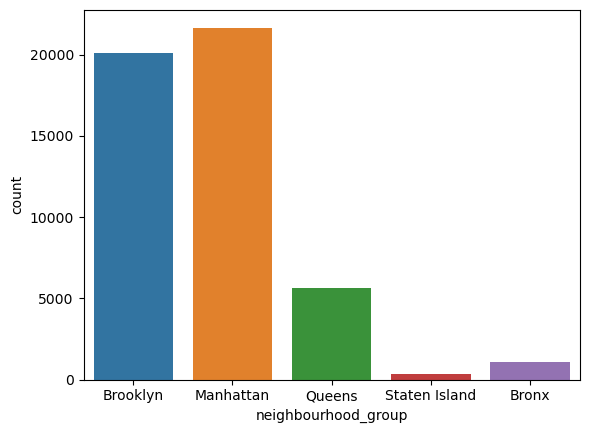

In [39]:
sns.countplot(data = df, x = 'neighbourhood_group')

<Axes: xlabel='room_type', ylabel='count'>

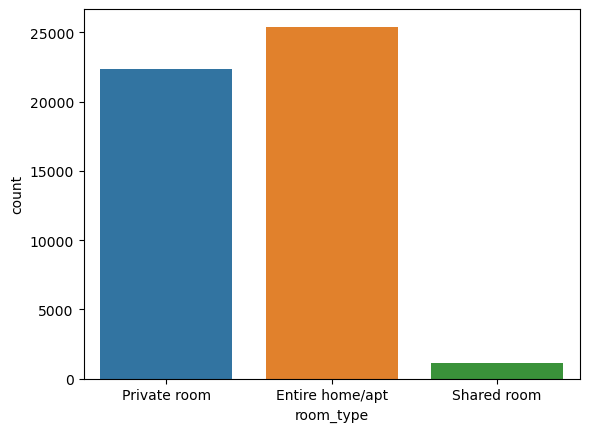

In [40]:
sns.countplot(data = df, x = 'room_type')

<Axes: xlabel='neighbourhood_group', ylabel='count'>

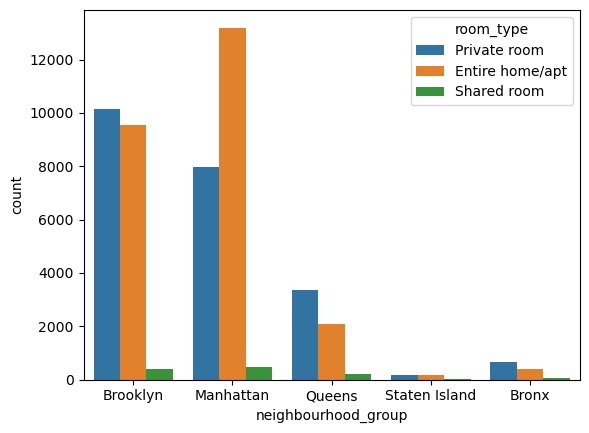

In [41]:
sns.countplot(data = df, x = 'neighbourhood_group', hue = 'room_type')

# Pia Chart : Suitable for Proportional Distribution

<Axes: ylabel='count'>

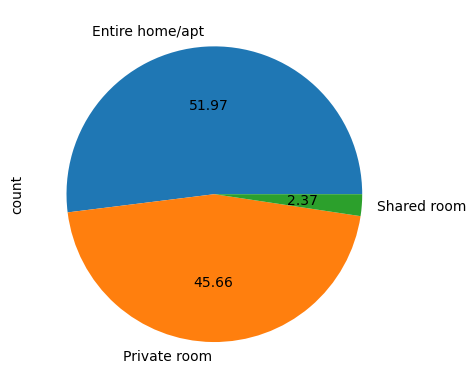

In [47]:
df['room_type'].value_counts().plot(kind = 'pie' , autopct = '%.2f')    # by using %.2f get upto value 2 decimal point


<Axes: ylabel='count'>

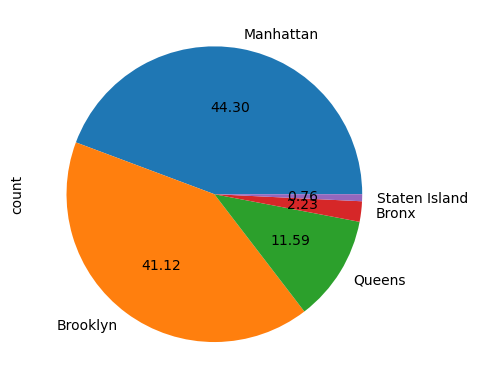

In [48]:
df['neighbourhood_group'].value_counts().plot(kind = 'pie' , autopct = '%.2f')

In [51]:
df2 = sns.load_dataset('titanic')
df2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

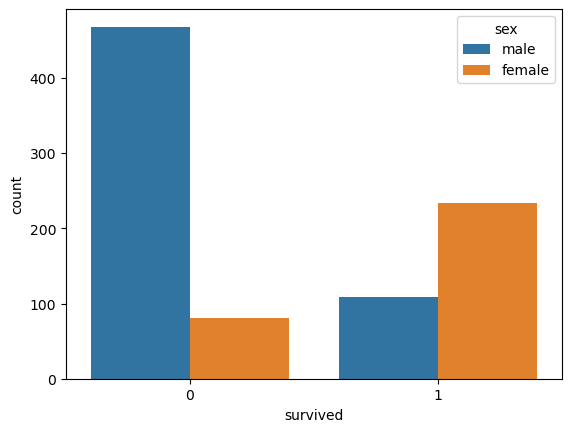

In [53]:
sns.countplot(data = df2 , x = 'survived', hue = 'sex')

<Axes: xlabel='class', ylabel='count'>

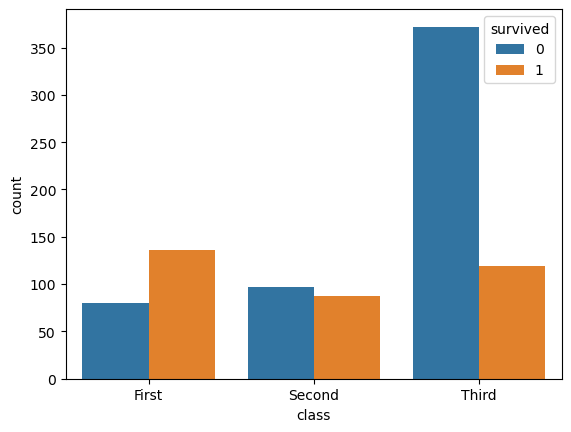

In [55]:
sns.countplot(data = df2 , x = 'class', hue = 'survived')

<Axes: ylabel='count'>

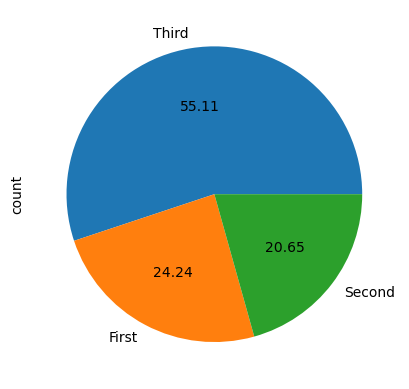

In [58]:
df2['class'].value_counts().plot(kind = 'pie' , autopct = '%.2f')

# Univarient on Numeric Data : Graphical Analysis

In [59]:
import pandas as pd
import seaborn as sns

In [60]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Histogram : Distribution of numeric data

<Axes: xlabel='price', ylabel='Count'>

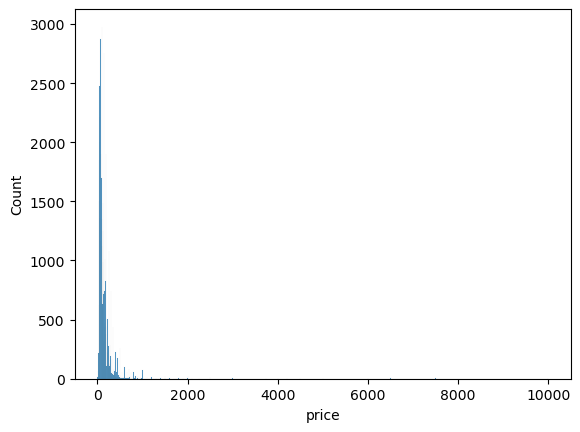

In [61]:
sns.histplot(data = df , x = 'price')

<Axes: xlabel='price', ylabel='Count'>

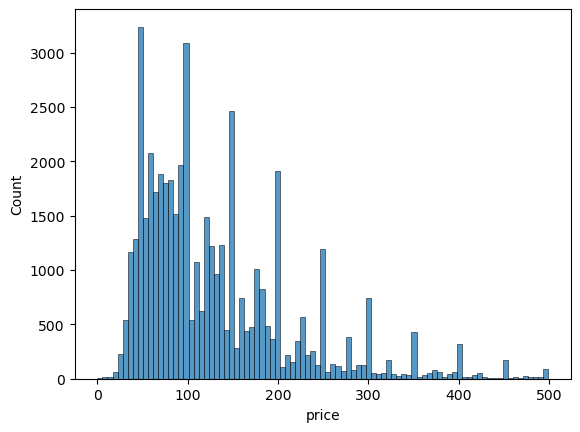

In [63]:
sns.histplot(data = df[df['price']<500] , x = 'price')

<Axes: xlabel='availability_365', ylabel='Count'>

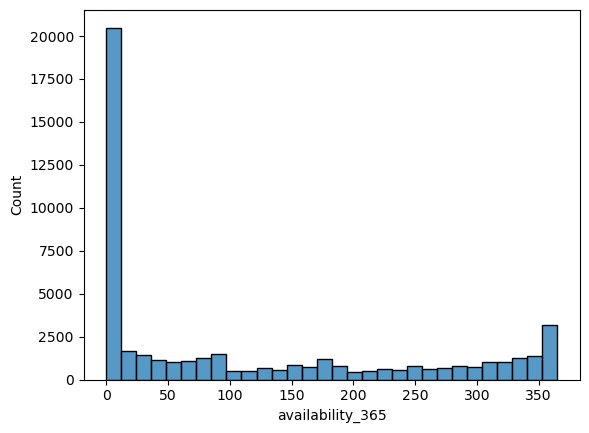

In [64]:
sns.histplot(data = df , x = 'availability_365')

## Distribution : representation of data density

C:\Users\user\AppData\Local\Temp\ipykernel_6464\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

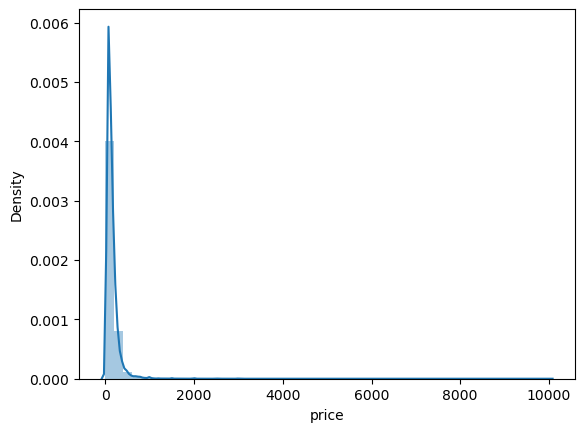

In [66]:
sns.distplot(df['price'])

C:\Users\user\AppData\Local\Temp\ipykernel_6464\2842795716.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['availability_365'])


<Axes: xlabel='availability_365', ylabel='Density'>

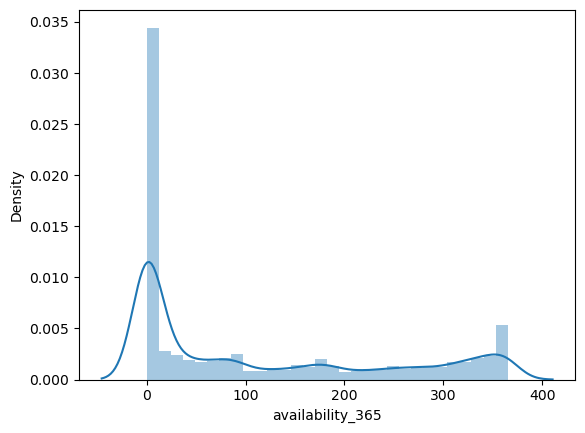

In [67]:
sns.distplot(df['availability_365'])

C:\Users\user\AppData\Local\Temp\ipykernel_6464\4190268020.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['reviews_per_month'])


<Axes: xlabel='reviews_per_month', ylabel='Density'>

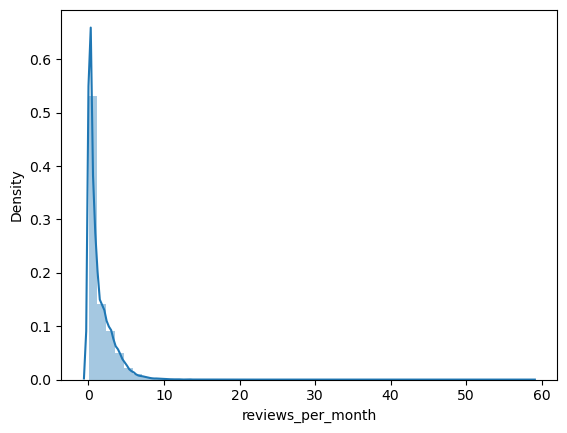

In [68]:
sns.distplot(df['reviews_per_month'])

## Boxplot : it will give the outliers and min-max values of the data

<Axes: >

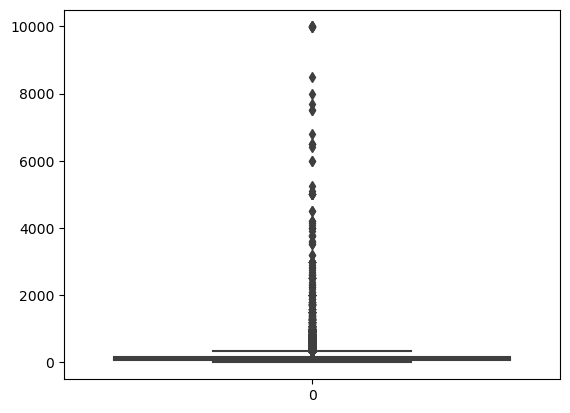

In [69]:
sns.boxplot(df['price'])

<Axes: >

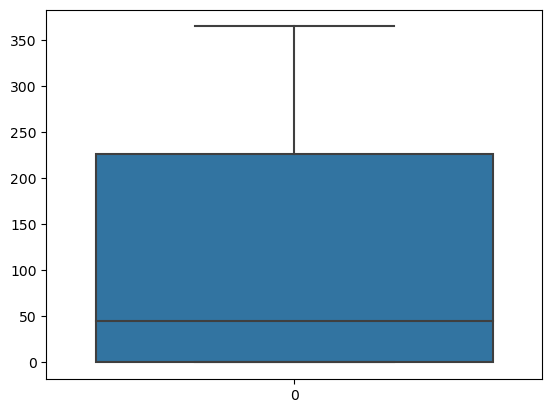

In [70]:
sns.boxplot(df['availability_365'])

In [71]:
df2 = sns.load_dataset('titanic')
df2.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


<Axes: xlabel='fare', ylabel='Count'>

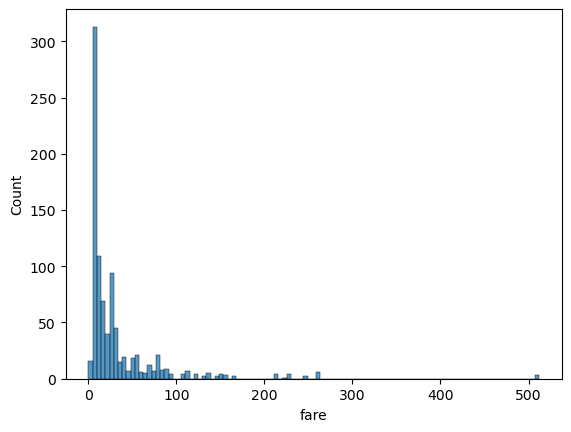

In [72]:
sns.histplot(data = df2, x = 'fare')

C:\Users\user\AppData\Local\Temp\ipykernel_6464\2415969963.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['fare'])


<Axes: xlabel='fare', ylabel='Density'>

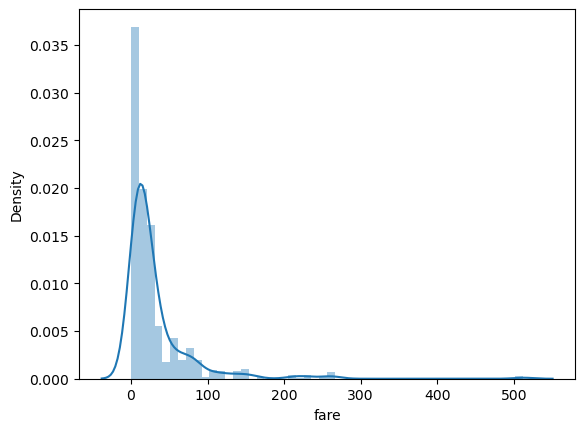

In [73]:
sns.distplot(df2['fare'])

<Axes: >

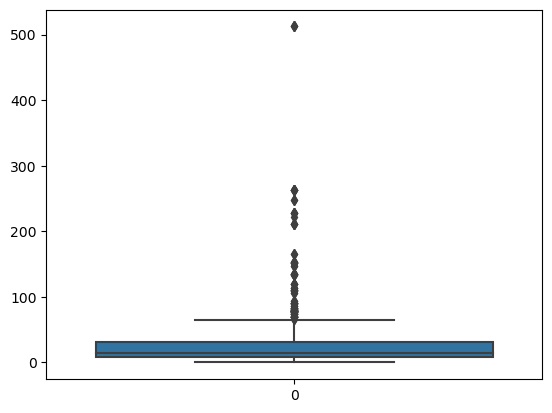

In [75]:
sns.boxplot(df2['fare'])

<Axes: >

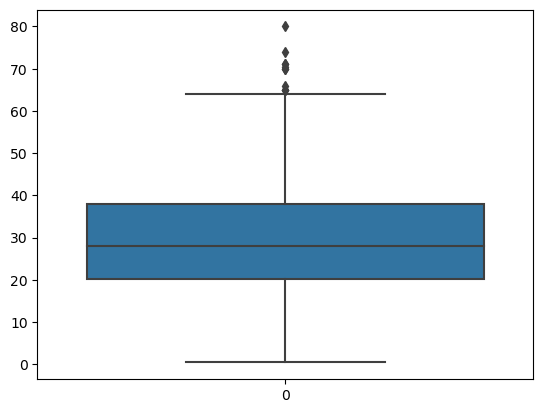

In [76]:
sns.boxplot(df2['age'])

## ViolinPlot : show the central tedency and density of data at same time

<Axes: >

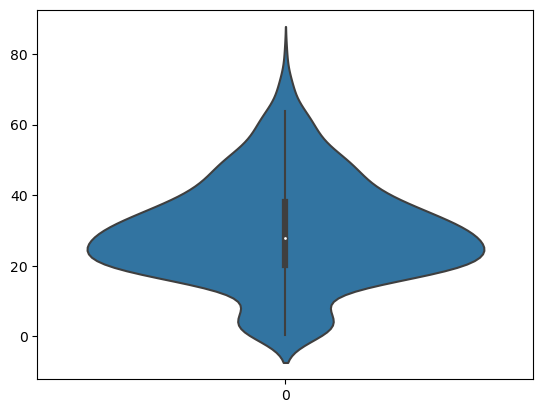

In [79]:
sns.violinplot(df2['age'])     ## used to show the distribution of data

# Bivariente Analysis : Numerical Analysis 


In [80]:
import pandas as pd 
import seaborn as sns

In [81]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class', ylabel='age'>

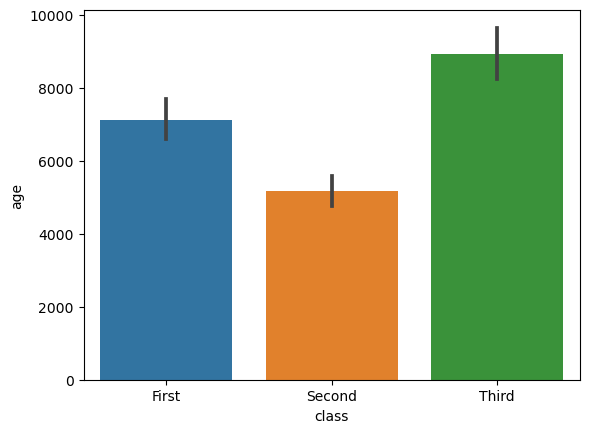

In [86]:
sns.barplot(x = 'class' , y = 'age' , data = df, estimator = 'sum')  # here work on the total sum it will used when need of total amount

<Axes: xlabel='class', ylabel='age'>

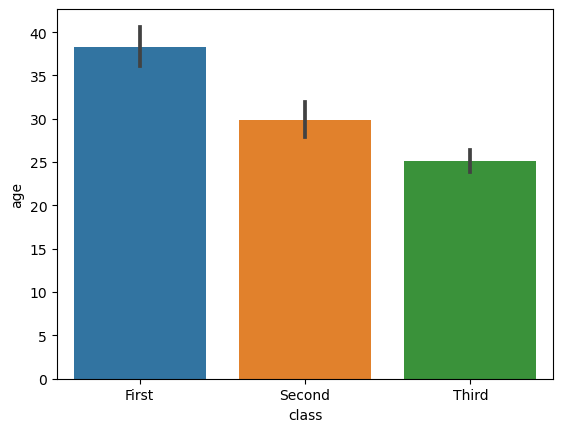

In [84]:
sns.barplot(x = 'class' , y = 'age' , data = df)   # here work on the mean value basis 

<Axes: xlabel='class', ylabel='fare'>

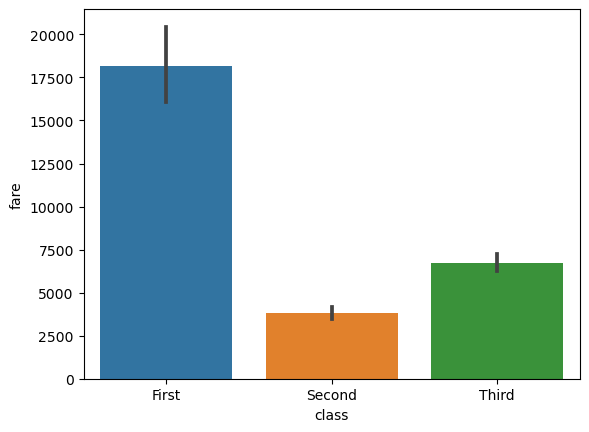

In [85]:
sns.barplot(x = 'class' , y = 'fare' , data = df, estimator = 'sum')

<Axes: xlabel='class', ylabel='age'>

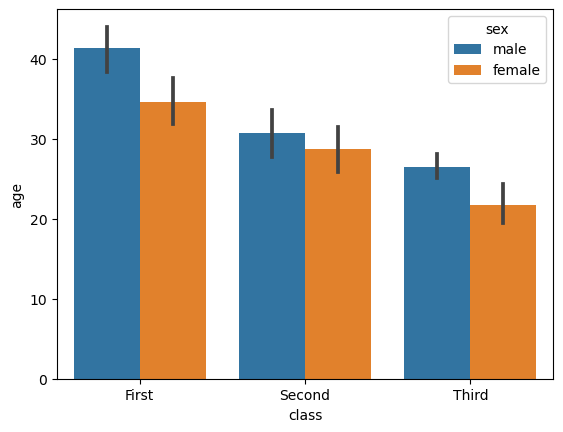

In [87]:
sns.barplot(x = 'class' , y = 'age' ,hue = 'sex', data = df)

<Axes: xlabel='class', ylabel='fare'>

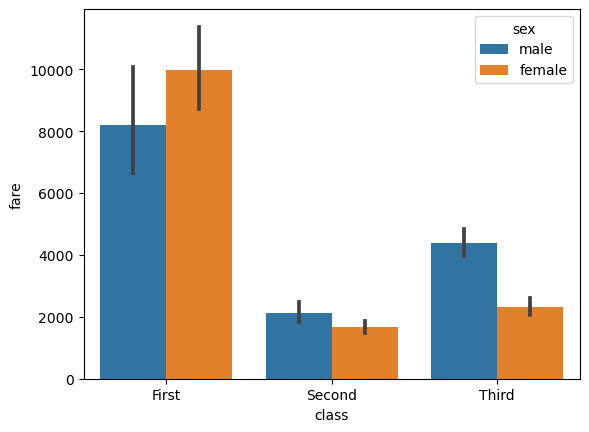

In [90]:
sns.barplot(x = 'class' , y = 'fare' , hue = 'sex' ,data = df,estimator = 'sum')

<Axes: xlabel='class', ylabel='age'>

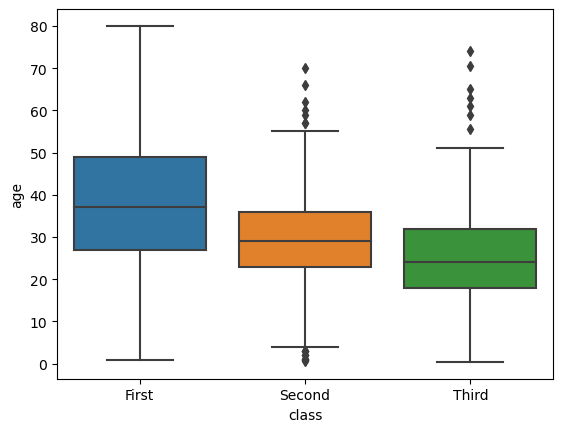

In [92]:
sns.boxplot(x = 'class' , y = 'age' , data = df)

<Axes: xlabel='class', ylabel='age'>

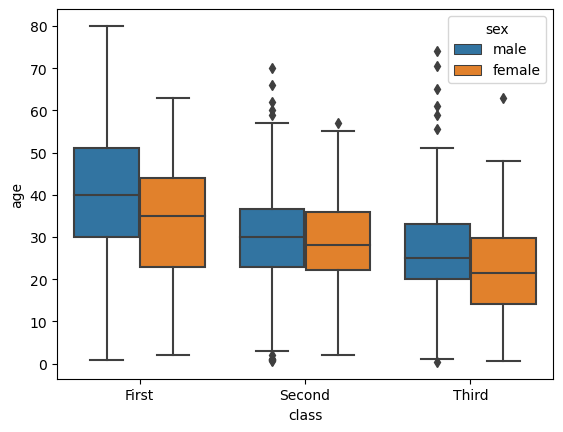

In [93]:
sns.boxplot(x = 'class' , y = 'age' , hue = 'sex' ,data = df)

<Axes: xlabel='class', ylabel='age'>

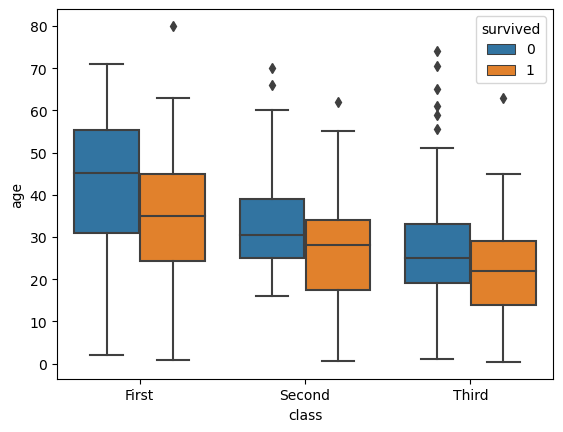

In [94]:
sns.boxplot(x = 'class' , y = 'age' , hue = 'survived' ,data = df)

<Axes: xlabel='class', ylabel='age'>

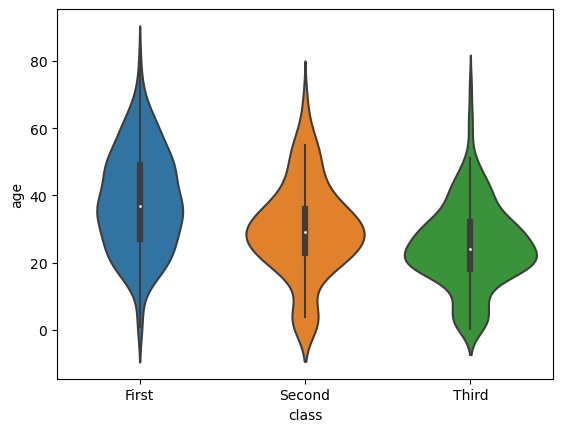

In [98]:
sns.violinplot(x = 'class' , y = 'age' , data = df)   ## violinplot gives the probablity and boxplot at one time

C:\Users\user\AppData\Local\Temp\ipykernel_6464\1265205442.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['class'] == 'Second']['age'])


<Axes: xlabel='age', ylabel='Density'>

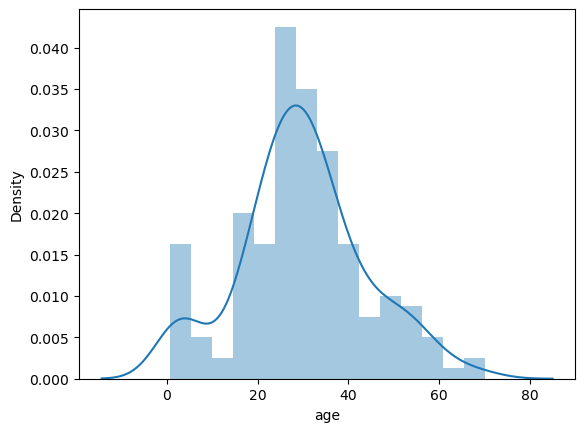

In [97]:
sns.distplot(df[df['class'] == 'Second']['age'])

# Bivarient Data Categorial:

In [99]:
import pandas as pd
import seaborn as sns

In [100]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

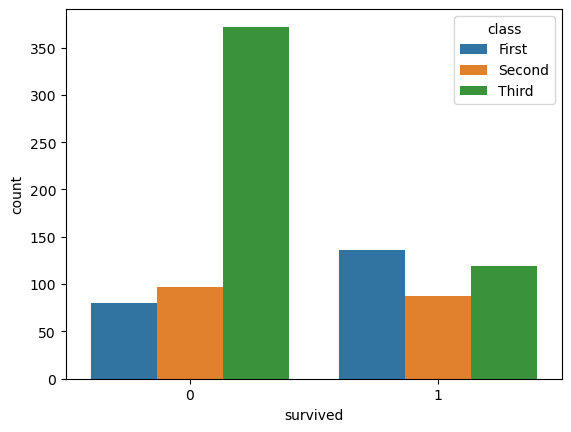

In [105]:
sns.countplot(x = 'survived',hue = 'class',data = df)

In [107]:
x = pd.crosstab(df['survived'],df['class'])      ## here we get the pivot table
x

class,First,Second,Third
survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='class', ylabel='survived'>

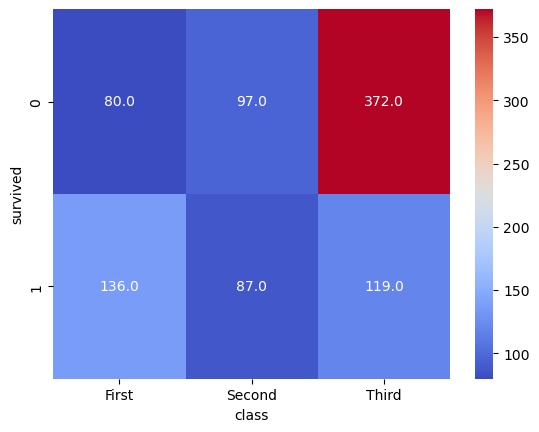

In [113]:
sns.heatmap(x,annot = True , fmt = '.1f', cmap = 'coolwarm')     # it will used to get the relations between the two columns.

<Axes: xlabel='class', ylabel='age'>

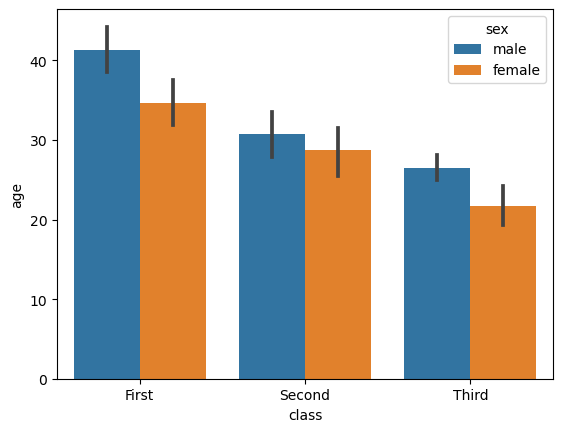

In [114]:
sns.barplot(x = 'class' , y = 'age' , hue = 'sex' , data = df)

<Axes: xlabel='class', ylabel='age'>

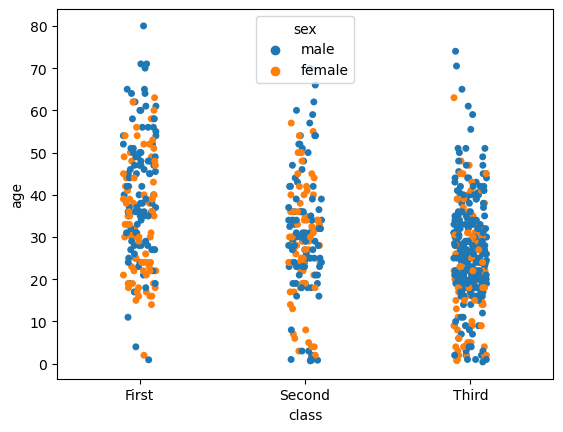

In [116]:
sns.stripplot(x = 'class' , y = 'age' , hue = 'sex' , data = df)   # used to show the distribution of data

In [117]:
df2 = sns.load_dataset('iris')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: >

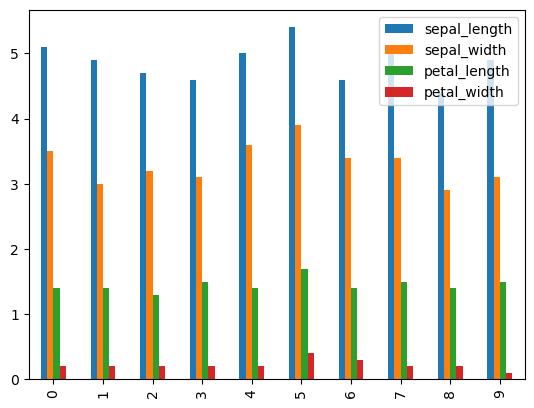

In [118]:
df2.head(10).plot(kind = 'bar')   # used to get the plot of first 10 rows of the data

<Axes: >

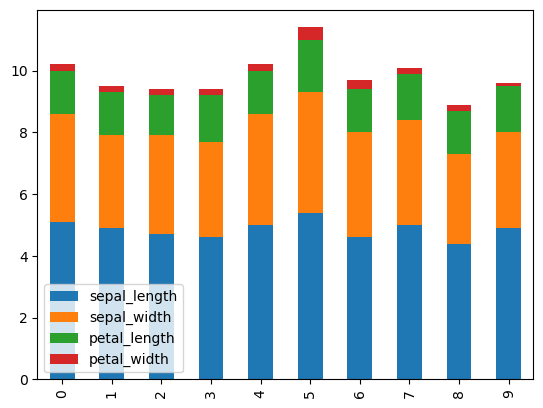

In [119]:
df2.head(10).plot(kind = 'bar', stacked = 'True') 

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


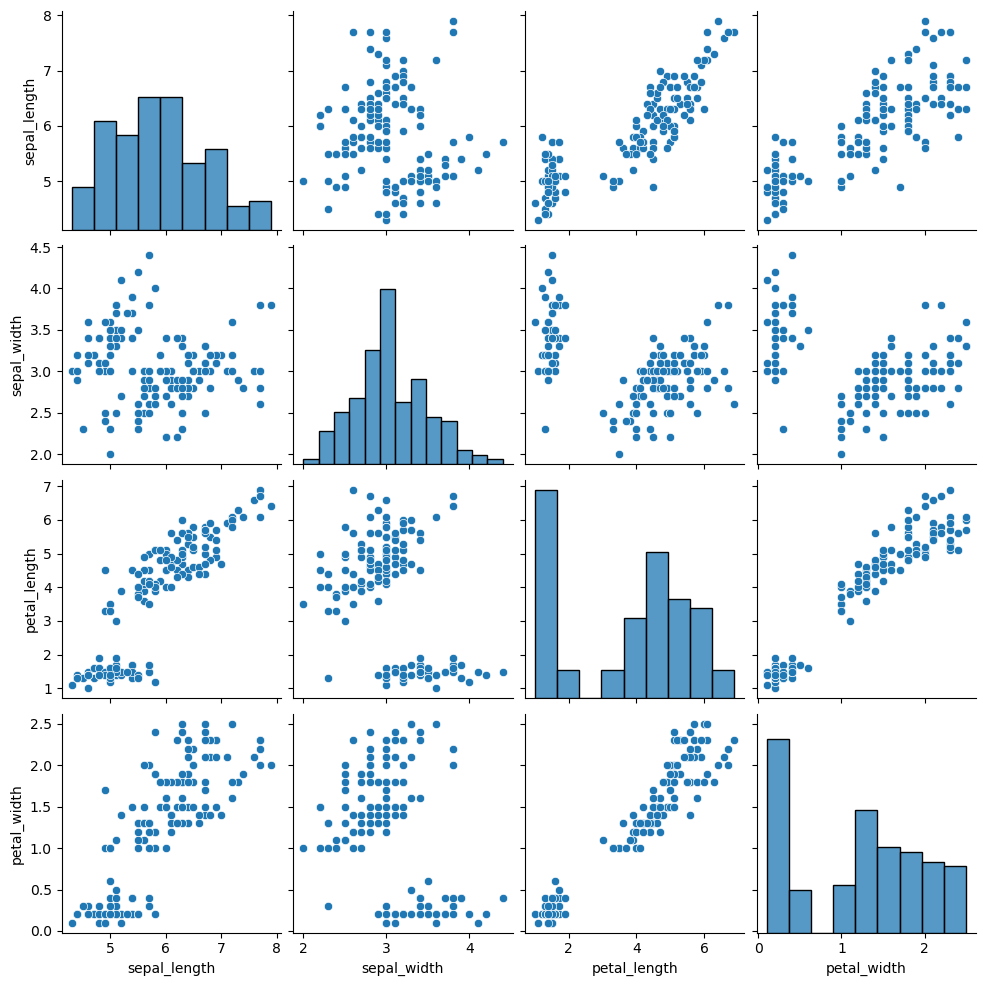

In [121]:
sns.pairplot(df2)    ## it will used to get n*n relations between the columns

# Bivarient Analysis :Numeric part2

In [122]:
import pandas as pd
import seaborn as sns

In [124]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## ScatterPlot : it will used to see if increase in one value then what affect on other one

<Axes: xlabel='age', ylabel='fare'>

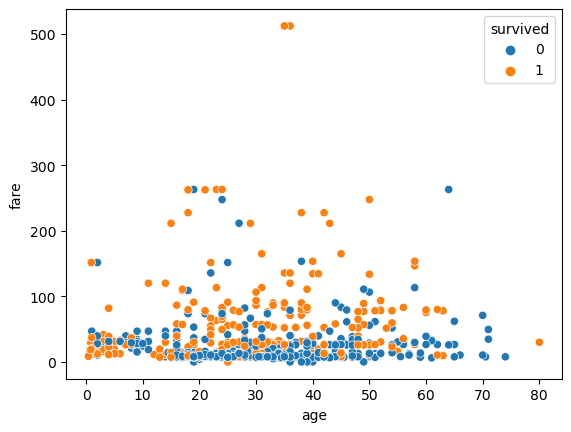

In [127]:
sns.scatterplot(x = 'age', y = 'fare' , hue = 'survived',data = df)

In [128]:
df2 = sns.load_dataset('tips')
df2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

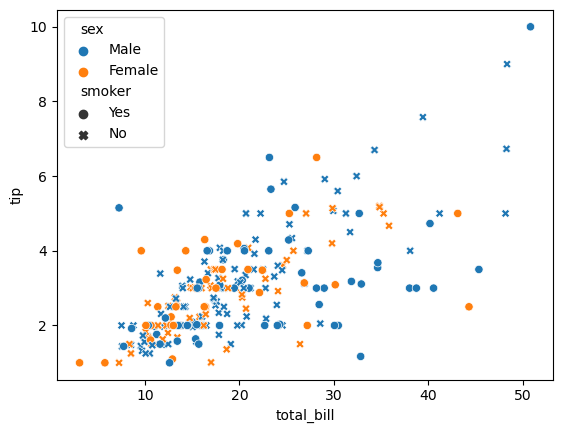

In [131]:
sns.scatterplot(x = 'total_bill' , y = 'tip', hue = 'sex' ,style = 'smoker',data = df2)

## Joint Plot : Gives the Scatter Plot and Distribution of the data

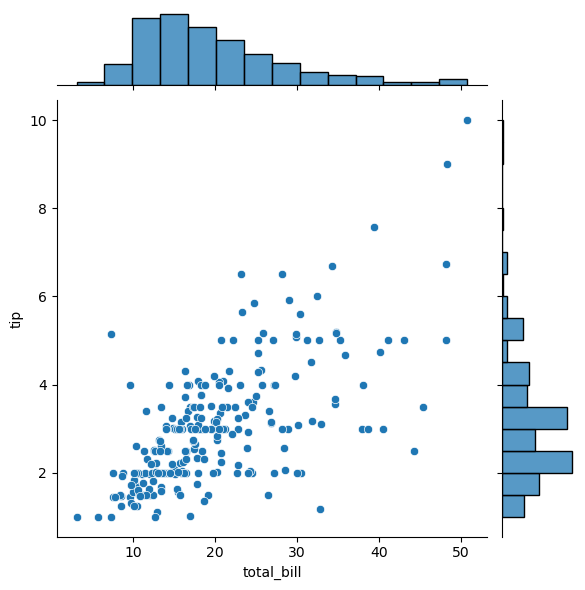

In [133]:
sns.jointplot(x = 'total_bill' , y = 'tip',data = df2)

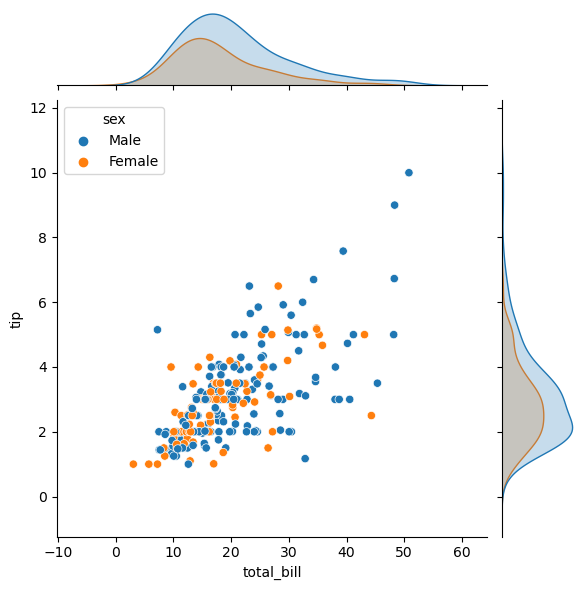

In [135]:
sns.jointplot(x = 'total_bill' , y = 'tip',hue = 'sex',data = df2)

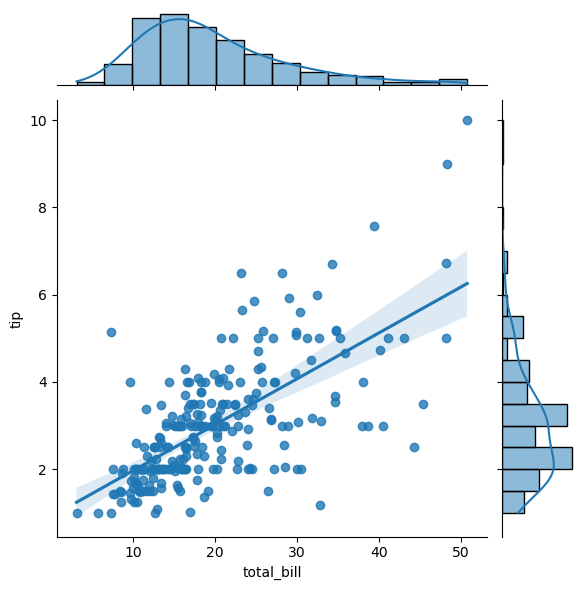

In [136]:
sns.jointplot(x = 'total_bill' , y = 'tip',data = df2, kind = 'reg')

In [140]:
# df2.corr()

In [143]:
sns.get_dataset_names()    # get the names of data set of the seaborn have

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [145]:
df = sns.load_dataset('dowjones')
df.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


## LinePlot

<Axes: xlabel='Date', ylabel='Price'>

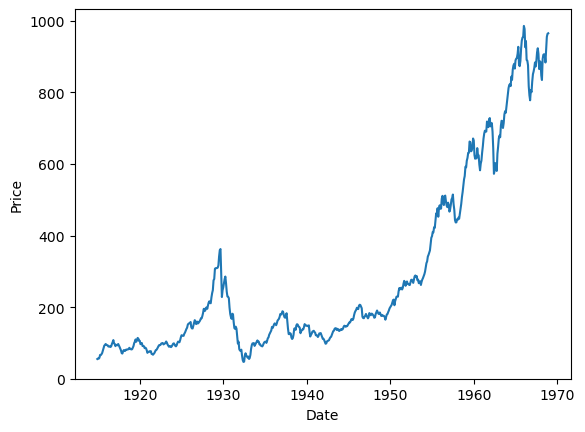

In [149]:
sns.lineplot(x = 'Date' , y = 'Price' , data = df)

In [151]:
df['Months'] = df['Date'].dt.month
df['Years'] = df['Date'].dt.year

df

,Date,Price,Months,Years
0,1914-12-01,55.00,12,1914
1,1915-01-01,56.55,1,1915
2,1915-02-01,56.00,2,1915
3,1915-03-01,58.30,3,1915
4,1915-04-01,66.45,4,1915
...,...,...,...,...
644,1968-08-01,883.72,8,1968
645,1968-09-01,922.80,9,1968
646,1968-10-01,955.47,10,1968
647,1968-11-01,964.12,11,1968


<Axes: xlabel='Date', ylabel='Price'>

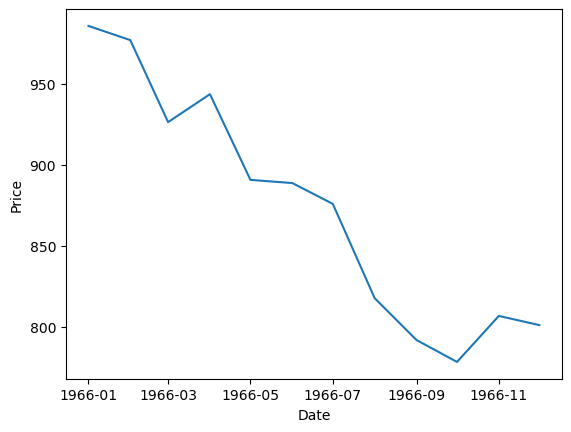

In [152]:
sns.lineplot(x = 'Date' , y = 'Price' , data = df[df['Years']==1966])    ## Checking the trend.